
##### Learn more about Gradient Descent :
 - [machinelearningmastery.com](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)
 - [Siraj Raval YouTube Video](https://www.youtube.com/watch?v=XdM6ER7zTLk&t=85s)
 - [spin.atomicobject.com](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)
 

In [1]:
from numpy import * 

In [2]:
#read the data file
points = genfromtxt('https://raw.githubusercontent.com/llSourcell/linear_regression_live/master/data.csv',delimiter=',')

#print the first 5 records to check the data
points[:5,:]

array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513]])

In [3]:
print("Total records in the data file : {}".format(len(points)))
print("What kind of Numpy Array : {} ".format(points.shape))

Total records in the data file : 100
What kind of Numpy Array : (100, 2) 


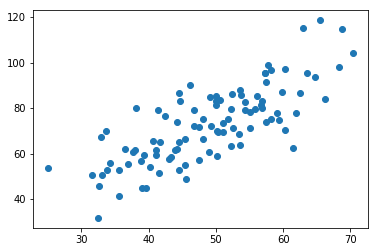

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
x = points[:,0]
y = points[:,1]
plt.scatter(x,y)

##### In the following functions we will be calculating the following
 - MSE (Mean Squared Error)
 - Partial derivatives for m, b
 
The formulas for the cost function, derivatives etc can be found [here](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)

In [5]:
# MSE (Mean Squared Error)
def compute_error(b, m, points):
    error = 0
    for i in range(len(points)):
        x = points[i, 0]    # firt column from array
        y = points[i, 1]    # second column from array
        error += (y - (m*x + b)) ** 2
        return error / float(len(points))

In [6]:
def gradient_step(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m * x) + current_b))
    
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)
    
    return [new_b, new_m]

In [7]:
def gradient_descent(points, learning_rate, starting_m, starting_b, num_of_iterations):
    b = starting_b
    m = starting_m    
    for i in range(num_of_iterations):
        b, m = gradient_step(b, m, array(points),learning_rate)
    
    return [b,m]

##### plot the list of data points and the line that we have predicted

 - this can be improved
 - merge the two graphs so that it gives a clearer picutre about our prediction

In [8]:
def get_yhat(b,m):
    yhat = []
    x = points[:,0]
    for i in range(len(points)):
        xi = x[i]
        yhat.append( (m * xi) + b)
    
    plt.subplot(1,2,1)
    plt.plot(x,yhat,"red")
    plt.xlabel("X")
    plt.ylabel("Predicted Y")

    plt.subplot(1,2,2)
    x = points[:,0]
    y = points[:,1]
    plt.scatter(x,y)   
    plt.show()

In [9]:
# lets define the hyer parameters
# remember the formula y = mx = b
def main_run():
    learning_rate = 0.0001
    initial_m = 0
    initial_b = 0
    num_of_iterations = 1000
    [b, m] = gradient_descent(points, learning_rate, initial_m, initial_b, num_of_iterations)
    get_yhat(b,m)
    print("b : {} , m : {}".format(b, m))

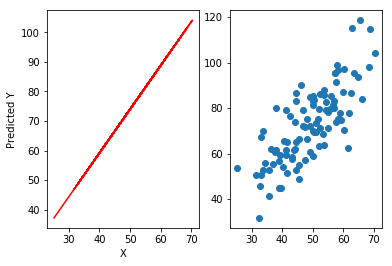

b : 0.08893651993741346 , m : 1.4777440851894448


In [10]:
main_run()